## Novel tank behavior analysis

In [1]:
import numpy as np
import pandas as pd
import csv
import os, shutil
import glob
import matplotlib.pyplot as plt
from IPython.display import Image
import math
from math import sqrt
import matplotlib.mlab as mlab
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

Import data

In [2]:
date = '27.07.2022'
path = 'temp_bin/'+str(date)
allFiles = glob.glob(path + '/*.txt')


header = ['Trialtime','Recordingtime','Xcenter','Ycenter','Area','Areachange','Elongation','Distancemoved','Velocity','Result1']
listdf = []
for file_ in allFiles:
    df = pd.read_csv(file_, names=header, index_col=False, encoding ='utf-16',  skiprows=34)
    df = df.filter(['Recordingtime','Xcenter','Ycenter'], axis=1)
    df = df[df.Xcenter != '-']
    df = df.astype(float) #float it
    df = df.reset_index(drop=True)
    listdf.append(df)

Calculate distance moved

In [3]:
for df in listdf:
    distance_moved=[] 
    for i in range(1,len(df.Xcenter)):
        a = df.Xcenter[i]- df.Xcenter[i-1] #a = current x coordinate - previous x coordinate
        b = df.Ycenter[i]- df.Ycenter[i-1] #c = current y coordinate - previous y coordinate
        truedistance = sqrt(a**2 + b**2) # hypotenuse calculation
        distance_moved.append(truedistance)
    distance_moved.insert(0,0)
    df['Distance_moved'] = distance_moved # replace Distance_moved column with new true distance"

Depth

In [4]:
binsize = 30 #number of seconds for each bin
listmean=[]

for df in listdf:
    df1 = df.set_index(['Recordingtime'])
    bins = int(df['Recordingtime'].max()/binsize)
    for i in range(0, bins):
        value = (df1.loc[i*binsize:(i*binsize)+binsize])
        mean = value['Ycenter'].mean()
        listmean.append(mean+2.4)
        

dfdepth = pd.DataFrame()        
i = 0

for s in range(1, len(allFiles)):
    dfdepth['Subject '+str(i)] = listmean[i*bins:(i*bins)+bins]
    i = i+1
    
dfdepth_transposed =  dfdepth.transpose()
dfdepth.to_csv('data/dfdepth.csv')
dfdepth

,Subject 0,Subject 1,Subject 2,Subject 3,Subject 4,Subject 5,Subject 6,Subject 7,Subject 8,Subject 9,...,Subject 25,Subject 26,Subject 27,Subject 28,Subject 29,Subject 30,Subject 31,Subject 32,Subject 33,Subject 34
0,0.388511,0.197678,0.339810,0.164669,0.200357,0.659593,0.303542,10.403680,0.458076,0.417328,...,0.356717,1.103328,3.645087,1.206430,1.645479,1.006493,0.323578,0.402056,0.748570,1.984421
1,0.480087,0.009978,0.319742,0.196173,0.365775,0.691308,0.568222,10.888463,0.889837,0.376006,...,0.723256,2.224200,2.011901,1.323898,3.829610,0.378005,0.401296,0.285997,0.375543,2.141609
2,0.243833,0.048488,0.573438,0.123331,0.649430,0.803045,0.378181,10.883424,0.459049,0.573739,...,1.382118,2.527275,2.047389,1.394596,1.998343,0.885222,0.810739,0.360945,0.279990,1.696321
3,0.255707,0.004302,0.549787,0.407026,0.603074,1.155727,0.665831,10.879906,0.750635,0.503322,...,0.347219,1.950421,1.237974,4.418869,1.529322,0.695589,0.820574,0.430407,0.676709,3.693539
4,0.828598,0.075175,0.981996,0.994885,0.796878,2.356426,1.247921,10.882223,0.867660,0.840997,...,0.683131,1.409913,2.124592,4.133648,2.172251,0.821239,1.343418,0.654051,0.406318,2.953071
5,0.946297,0.021706,0.991087,0.768905,0.707844,1.892521,0.948999,10.893786,0.668655,0.856441,...,0.338730,1.623000,2.685187,3.015091,1.737736,0.957122,1.713827,0.765016,0.512555,2.354794
6,0.860210,0.155244,1.328340,1.295560,0.847201,1.614062,1.201542,10.904738,0.761393,0.486132,...,1.387723,0.081051,3.954041,2.582326,1.764635,1.568295,1.368974,0.470724,0.970506,1.614779
7,0.679626,0.216761,1.307387,1.166294,0.431386,1.993645,1.360868,10.886861,1.090057,0.954031,...,2.351453,0.047679,4.189476,1.881213,3.138278,0.582145,0.820943,0.661604,1.023569,1.995512
8,1.366818,0.319671,1.215480,1.364529,0.628755,2.435274,2.619809,10.860131,1.267629,0.692914,...,2.757932,0.160214,4.389640,2.186218,1.480535,0.958788,2.851288,0.487100,1.187484,2.514911
9,1.969903,0.219164,2.010723,0.959408,1.093055,2.871722,1.966890,10.855978,0.915420,1.531298,...,2.773420,0.223184,3.242563,2.908066,3.160274,1.359481,2.386268,0.308666,0.865452,2.484867


Speed

In [5]:
binsize = 30 #number of seconds for each bin
listmean=[]
for df in listdf:
    
    #df1 = df[df.Distance_moved > 0.4]
    #df1 = df1.reset_index(drop=True)
    #df1 = df1.set_index(['Recordingtime'])
    
    df1 = df.set_index(['Recordingtime'])
    bins = int(df['Recordingtime'].max()/binsize)
    for i in range(0, bins):
        value = (df1.loc[i*binsize:(i*binsize)+binsize])
        mean = value['Distance_moved'].mean()
        listmean.append(mean*30)

dfspeed = pd.DataFrame()        
i = 0
for s in range(1, len(allFiles)):
    dfspeed['Subject '+str(i)] = listmean[i*bins:(i*bins)+bins]
    i = i+1
    
dfspeed_transposed =  dfspeed.transpose()
dfspeed.to_csv('data/dfspeed.csv')
dfspeed

,Subject 0,Subject 1,Subject 2,Subject 3,Subject 4,Subject 5,Subject 6,Subject 7,Subject 8,Subject 9,...,Subject 25,Subject 26,Subject 27,Subject 28,Subject 29,Subject 30,Subject 31,Subject 32,Subject 33,Subject 34
0,10.644682,10.503243,12.982497,9.616496,0.885246,2.881055,6.378500,3.896333,10.743024,6.239357,...,4.905964,3.996890,5.154890,5.287493,3.743800,4.539082,8.563362,9.117202,9.709126,5.132570
1,9.320776,0.033506,6.824405,10.092262,7.518852,3.143823,4.900265,0.110088,4.369894,7.178289,...,3.700460,2.849983,4.547397,5.072081,2.517084,8.701067,8.299712,5.470710,7.166048,3.331459
2,6.228289,3.819728,9.348865,6.048822,7.041290,4.107076,5.101796,0.117003,11.364201,7.144222,...,3.655456,3.186580,5.042616,5.428743,3.155897,6.577271,7.567477,7.016140,8.792557,3.637795
3,6.072867,0.028254,7.813674,7.141869,6.733105,3.939682,5.842028,0.115150,4.062360,7.512245,...,3.852311,3.247063,5.818804,4.288841,3.678746,8.534255,6.799279,5.123380,7.364898,3.984648
4,8.902645,5.735798,8.361488,6.306588,7.057233,4.634095,7.255046,0.120338,7.644043,8.449201,...,5.159443,3.252845,5.689270,4.465634,3.774397,7.551306,7.191523,6.390945,8.583474,3.953714
5,7.431058,0.042718,6.803873,6.783027,7.633283,4.571420,6.722588,0.148228,8.836385,9.526404,...,2.106610,4.636312,5.033260,4.485661,5.855420,7.627422,6.487939,5.904904,8.387424,4.675916
6,6.983953,4.351724,7.892881,6.260522,7.857892,3.364893,6.894796,0.125411,8.558644,8.304533,...,3.539534,0.057552,5.895227,5.250692,5.829961,6.292454,6.970165,6.238427,7.053166,4.588225
7,4.837451,2.585673,7.134690,5.312319,5.483104,5.250368,6.545878,0.132537,9.408107,7.378382,...,4.867615,0.039446,5.540010,5.656843,6.024511,7.843783,5.243892,6.935845,6.065998,5.088062
8,5.446440,7.978858,7.865264,6.391747,7.588207,5.898595,5.340613,0.140732,6.491201,7.011368,...,5.313639,2.217246,5.346264,4.987462,6.022441,8.455120,5.870396,7.535241,6.550323,4.318912
9,6.503050,2.617111,8.103311,6.945338,6.713995,4.379879,6.940452,0.179603,7.076971,7.388005,...,4.739451,2.387065,5.166496,3.967177,5.044609,9.046121,5.846831,5.354734,5.651441,4.223061


Speed histogram

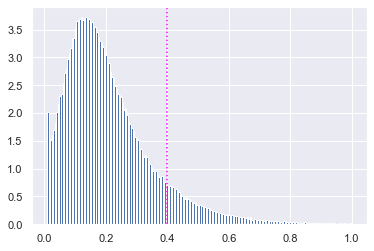

In [6]:
dfc = pd.concat(listdf)
dfc = dfc[dfc.Distance_moved < 1]
dfc = dfc[dfc.Distance_moved > 0.01]

plt.hist(dfc.Distance_moved, density=True, bins=200);

plt.axvline(x=0.4, ymin=0, ymax=3.5, c='magenta',linestyle='dotted');

Make traces

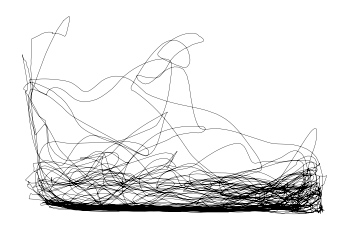

In [7]:
p = 0
for df in listdf:
    if p == 3:
        fig, ax1 = plt.subplots(1, 1, sharex=False);
        ax1.plot(df.Xcenter, df.Ycenter, linewidth=0.3, color="black");
        ax1.set_xticks([])
        ax1.set_yticks([])
        ax1.grid(False)
        ax1.get_xaxis().set_visible(False)
        ax1.set_facecolor('white')
    p=p+1
    
plt.savefig('xxx.png', dpi=1000)

Freezing

In [ ]:
Freezingthreshold = 0.01

for df in listdf:
    listfreezing=[]
    for i in range(5, len(df.Recordingtime)):
        if (df.Distance_moved[i-5] + df.Distance_moved[i-4] + df.Distance_moved[i-3] + df.Distance_moved[i-2] + df.Distance_moved[i-1] + df.Distance_moved[i]) < (Freezingthreshold * 5):
            freezing = 1
        else:
            freezing = 0
        listfreezing.append(freezing)
        
    for i in range(0, 5):
        listfreezing.insert(0,0)

    df['freezing'] = listfreezing


binsize = 30 #number of seconds for each bin
listmean=[]
for df in listdf:
    df1 = df.set_index(['Recordingtime'])
    bins = int(df['Recordingtime'].max()/binsize)
    for i in range(0, bins):
        value = (df1.loc[i*binsize:(i*binsize)+binsize])
        mean = value['freezing'].mean()
        listmean.append(mean*100)

dffreezing = pd.DataFrame()        
i = 0
for s in range(0, 11):
    dffreezing['Subject '+str(i)] = listmean[i*bins:(i*bins)+bins]
    i = i+1
    
dffreezing_transposed =  dffreezing.transpose()
dffreezing.to_csv('data/dffreezing.csv')
dffreezing